# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santiago del estero
Processing Record 2 of Set 1 | grand gaube
Processing Record 3 of Set 1 | samarai
Processing Record 4 of Set 1 | mega
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | catemaco
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | aripuana
Processing Record 11 of Set 1 | khor
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | vaini
Processing Record

Processing Record 39 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 40 of Set 4 | byron bay
Processing Record 41 of Set 4 | tyrma
Processing Record 42 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 4 | tateyama
Processing Record 44 of Set 4 | aktash
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | atuona
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | kalabo
Processing Record 49 of Set 4 | gao
Processing Record 0 of Set 5 | bara
Processing Record 1 of Set 5 | kandry
Processing Record 2 of Set 5 | tommot
Processing Record 3 of Set 5 | tautira
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | uttarkashi
Processing Record 6 of Set 5 | brownsville
Processing Record 7 of Set 5 | bar harbor
Processing Record 8 of Set 5 | togur
Processing Record 9 of Set 5 | luderitz
Processing Record 10 of Set 5 | taloqan
Processing Record 11 of Set 5 | katete
Processing Record 12 of Set 5 

Processing Record 23 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 24 of Set 8 | gujar khan
Processing Record 25 of Set 8 | meyungs
City not found. Skipping...
Processing Record 26 of Set 8 | sokolka
Processing Record 27 of Set 8 | moyale
Processing Record 28 of Set 8 | westport
Processing Record 29 of Set 8 | puerto quijarro
Processing Record 30 of Set 8 | ryotsu
Processing Record 31 of Set 8 | margate
Processing Record 32 of Set 8 | tokmak
Processing Record 33 of Set 8 | flinders
Processing Record 34 of Set 8 | havre-saint-pierre
Processing Record 35 of Set 8 | roma
Processing Record 36 of Set 8 | mackay
Processing Record 37 of Set 8 | santarem
Processing Record 38 of Set 8 | romny
Processing Record 39 of Set 8 | san luis
Processing Record 40 of Set 8 | cayenne
Processing Record 41 of Set 8 | tak
Processing Record 42 of Set 8 | dongsheng
Processing Record 43 of Set 8 | comodoro rivadavia
Processing Record 44 of Set 8 | talnakh
Processing Record 45 of Set 8 | a

Processing Record 12 of Set 12 | gizo
Processing Record 13 of Set 12 | homer
Processing Record 14 of Set 12 | prince rupert
Processing Record 15 of Set 12 | axim
Processing Record 16 of Set 12 | wiarton
Processing Record 17 of Set 12 | sao marcos
Processing Record 18 of Set 12 | udachnyy
Processing Record 19 of Set 12 | dickson
Processing Record 20 of Set 12 | trairi
Processing Record 21 of Set 12 | necochea
Processing Record 22 of Set 12 | jalu
Processing Record 23 of Set 12 | okhtyrka
Processing Record 24 of Set 12 | marfino
Processing Record 25 of Set 12 | koupela
Processing Record 26 of Set 12 | stilfontein
Processing Record 27 of Set 12 | umiray
Processing Record 28 of Set 12 | winburg
Processing Record 29 of Set 12 | sept-iles
Processing Record 30 of Set 12 | victor harbor
Processing Record 31 of Set 12 | chumikan
Processing Record 32 of Set 12 | beringovskiy
Processing Record 33 of Set 12 | kavaratti
Processing Record 34 of Set 12 | deputatskiy
Processing Record 35 of Set 12 | j

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santiago del estero,-27.7951,-64.2615,305.45,25,0,3.54,AR,1675723294
1,grand gaube,-20.0064,57.6608,298.37,81,82,0.89,MU,1675723294
2,samarai,-10.6167,150.6667,299.25,85,100,4.21,PG,1675723295
3,mega,4.0500,38.3000,289.58,37,9,2.99,ET,1675723295
4,punta arenas,-53.1500,-70.9167,288.21,67,75,7.20,CL,1675723115


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santiago del estero,-27.7951,-64.2615,305.45,25,0,3.54,AR,1675723294
1,grand gaube,-20.0064,57.6608,298.37,81,82,0.89,MU,1675723294
2,samarai,-10.6167,150.6667,299.25,85,100,4.21,PG,1675723295
3,mega,4.0500,38.3000,289.58,37,9,2.99,ET,1675723295
4,punta arenas,-53.1500,-70.9167,288.21,67,75,7.20,CL,1675723115


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

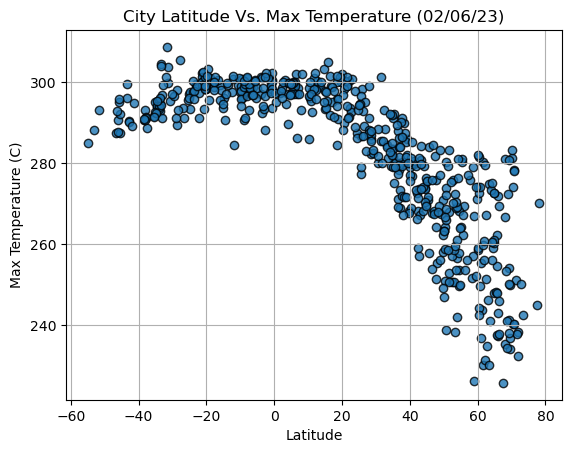

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

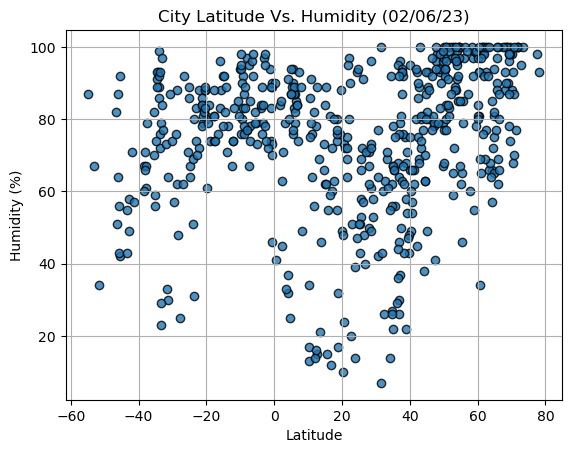

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

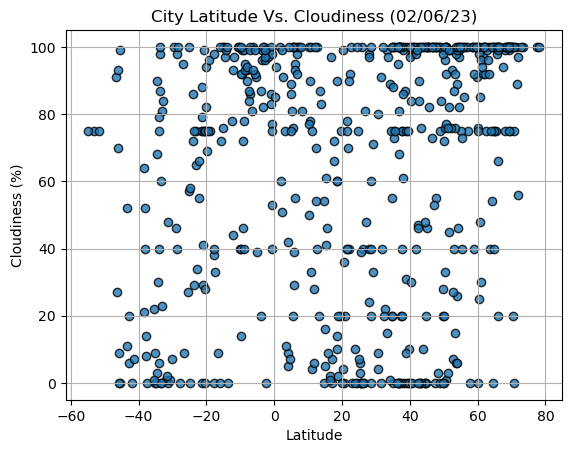

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

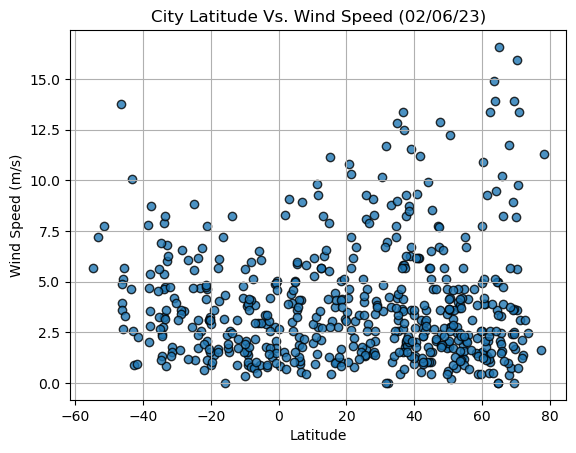

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values, y_label, text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, color="r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mega,4.0500,38.3000,289.58,37,9,2.99,ET,1675723295
5,catemaco,18.4167,-95.1167,295.81,80,60,1.05,MX,1675723296
10,khor,47.8861,134.9464,255.36,98,100,2.40,RU,1675723297
11,ponta do sol,32.6667,-17.1000,288.55,63,22,4.24,PT,1675723298
12,qaanaaq,77.4840,-69.3632,245.03,98,100,1.63,GL,1675723298


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santiago del estero,-27.7951,-64.2615,305.45,25,0,3.54,AR,1675723294
1,grand gaube,-20.0064,57.6608,298.37,81,82,0.89,MU,1675723294
2,samarai,-10.6167,150.6667,299.25,85,100,4.21,PG,1675723295
4,punta arenas,-53.1500,-70.9167,288.21,67,75,7.20,CL,1675723115
6,ushuaia,-54.8000,-68.3000,284.94,87,75,5.66,AR,1675723296


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8321939986431272


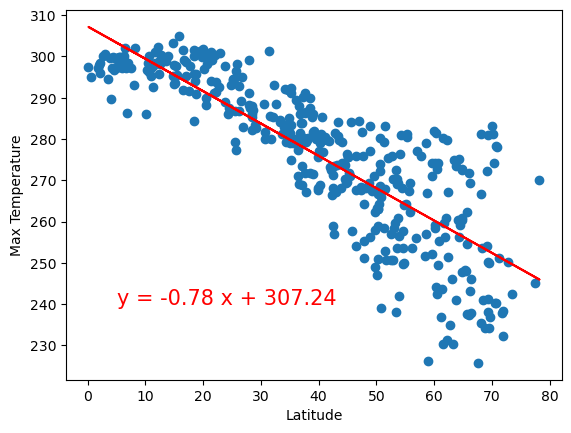

In [91]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (5,240))


The r-squared is: 0.4472159712519516


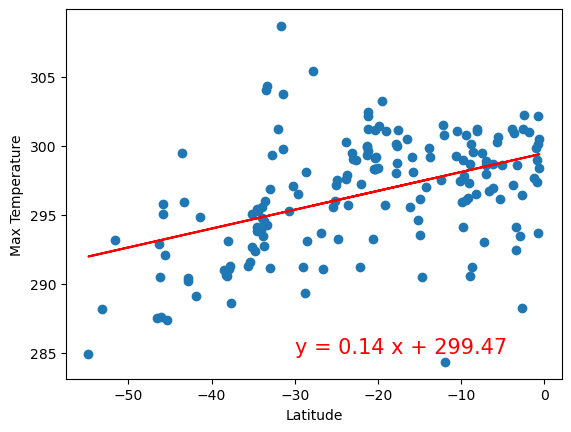

In [97]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (-30,285))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.41221661318890246


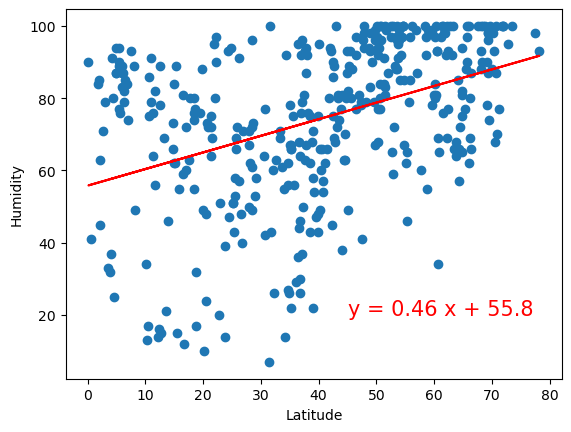

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (45,20))


The r-squared is: 0.41345169984525043


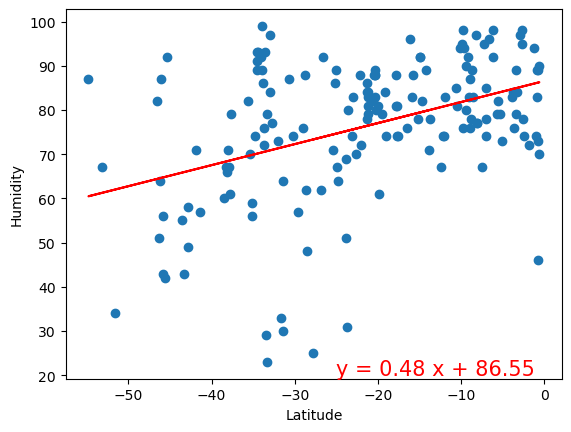

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-25,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.25952353062546546


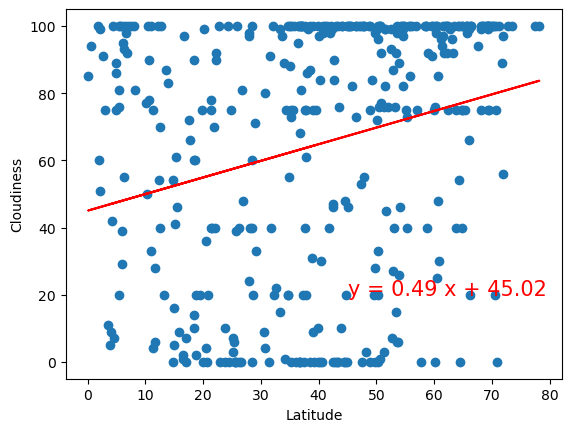

In [105]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (45,20))

The r-squared is: 0.4389439611728348


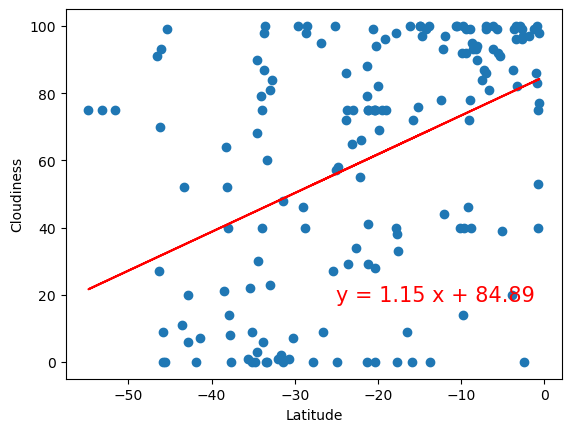

In [107]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-25,18))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.024093414196943115


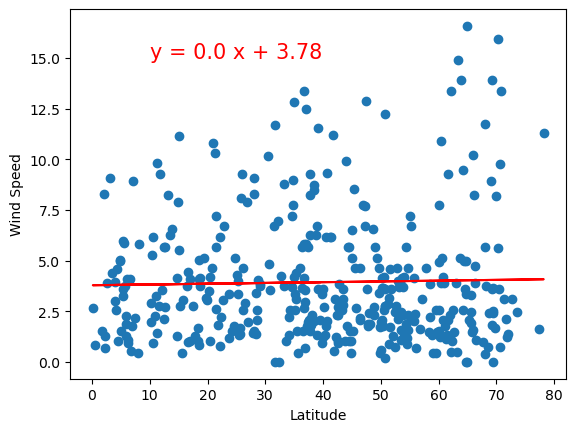

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (10,15))

The r-squared is: -0.3456287265083521


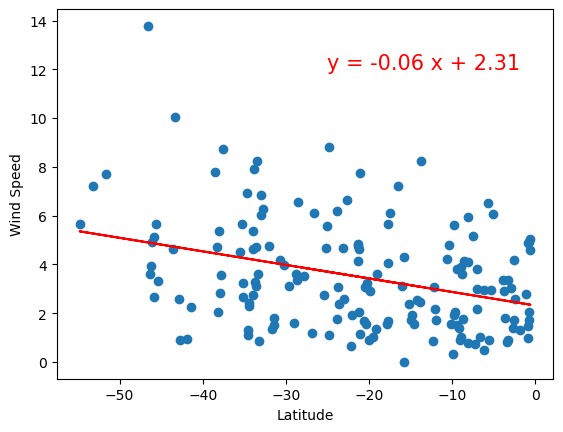

In [112]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-25,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE